In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-ii-data-set-from-ml-repository/online_retail_II.xlsx


In [59]:
# Kütüphanelerin okunması
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd

# veri dosyasının okunması

df_2010_2011 = pd.read_excel("../input/online-retail-ii-data-set-from-ml-repository/online_retail_II.xlsx", sheet_name = "Year 2010-2011")
df = df_2010_2011.copy()

In [60]:
# Tüm degisken ve gözlemleri görmek icin
pd.set_option('display.max_columns', None); 
pd.set_option('display.max_rows', None);


# virgulden sonra gösterilecek olan sayı sayısı
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt

In [61]:
# Bos deger sorgulama
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [62]:
#veri boyutunun sorgusu
df.shape

(541910, 8)

In [63]:
# essiz urun sayisi
df.Description.nunique()



4223

In [64]:
# urunlerin kaç kere gectigini gösteriyor
df.Description.value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64

In [65]:
# en cok siparis edilen urun hangisidir ? 
# iptallerden dolayı eksi deger gozukuyor
df.groupby("Description") .agg({"Quantity":"sum"}).head()

,Quantity
Description,
20713,-400
4 PURPLE FLOCK DINNER CANDLES,144
50'S CHRISTMAS GIFT BAG LARGE,1913
DOLLY GIRL BEAKER,2448
I LOVE LONDON MINI BACKPACK,389


In [66]:
#En cok hangi ürün alınmıs.
df.groupby("Description") .agg({"Quantity":"sum"}).sort_values("Quantity" ,ascending = False).head()



,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


In [67]:
#Toplamda odenen ucret
df["TotalPrice"] = df["Quantity"] * df["Price"]



In [68]:
#iptal olanların sorgusu
df[df["Invoice"].str.contains("C" , na = False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom,-6.96


In [69]:
# iptal olmayan degerleri getirdik
df = df[~df["Invoice"].str.contains("C" , na = False)]



In [70]:
#Faturaya gore en fazla odenen ucret.
df.groupby("Invoice").agg({"TotalPrice":"sum"}).head()

,TotalPrice
Invoice,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85


In [71]:
# en fazla alışveriş yapan ulke  İngiltere
df.Country.value_counts()[0:5]

United Kingdom    487622
Germany             9042
France              8409
EIRE                7894
Spain               2485
Name: Country, dtype: int64

In [72]:
# En fazla para harcayan ulke İngiltere
df.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice" , ascending = False).head()

,TotalPrice
Country,
United Kingdom,9003097.96
Netherlands,285446.34
EIRE,283453.96
Germany,228867.14
France,209733.11


In [73]:
# Çeyreklıklerinin gosterilmesi
df.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,532622.00,10.24,159.59,-9600.00,1.00,1.00,1.00,1.00,3.00,10.00,24.00,30.00,100.00,80995.00
Price,532622.00,3.85,41.76,-11062.06,0.19,0.42,0.62,1.25,2.08,4.13,7.95,9.95,16.98,13541.33
Customer ID,397925.00,15294.31,1713.17,12346.00,12415.00,12627.00,12883.00,13969.00,15159.00,16795.00,17725.00,17912.00,18211.00,18287.00
TotalPrice,532622.00,19.99,270.57,-11062.06,0.42,1.25,1.65,3.75,9.90,17.70,32.37,59.50,183.50,168469.60


In [74]:
# Aykırı olan degerlerin gosterimi.
for feature in ["Quantity","Price","TotalPrice"]:

    Q1 = df[feature].quantile(0.01)
    Q3 = df[feature].quantile(0.99)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, "no")

Quantity yes
1582
Price yes
1167
TotalPrice yes
1324


In [75]:
# Recency
#En son alısveris yapılan tarih.
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [76]:
# Bugunun tarihi olarak en son gecen tarihi ekledim.
import datetime as dt
today_date = dt.datetime(2011 , 12 ,10)
today_date

datetime.datetime(2011, 12, 10, 0, 0)

In [77]:
# Musterilerin en son ne zaman alısveris yaptıga bakıyoruz.
df.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()

,InvoiceDate
Customer ID,
12346.00,2011-01-18 10:01:00
12347.00,2011-12-07 15:52:00
12348.00,2011-09-25 13:13:00
12349.00,2011-11-21 09:51:00
12350.00,2011-02-02 16:01:00


In [78]:
# guzel gorunsun diye boyle yaptık
df["Customer ID"] = df["Customer ID"].dropna().astype(int)

In [79]:
# Musterilerin en son ne zaman alısveris yaptıga bakıyoruz.
df.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()

,InvoiceDate
Customer ID,
12346.00,2011-01-18 10:01:00
12347.00,2011-12-07 15:52:00
12348.00,2011-09-25 13:13:00
12349.00,2011-11-21 09:51:00
12350.00,2011-02-02 16:01:00


In [80]:
#Musterilerin en son alısveris yaptıgı tarihten bugunu cıkarıyoruz.
(today_date - df.groupby("Customer ID").agg({"InvoiceDate":"max"})).head()

,InvoiceDate
Customer ID,
12346.00,325 days 13:59:00
12347.00,2 days 08:08:00
12348.00,75 days 10:47:00
12349.00,18 days 14:09:00
12350.00,310 days 07:59:00


In [81]:
temp_df = (today_date - df.groupby("Customer ID").agg({"InvoiceDate":"max"}))

In [82]:
#Degisken ismini degistirdim.
temp_df.rename(columns = {"InvoiceDate":"Recency"} , inplace= True)



In [83]:
#Sadece gün sayısını elde ettik.
recency_df = temp_df.Recency.apply(lambda x : x.days)

In [84]:
# Frequency (sıklık)
df.groupby(["Customer ID", "Invoice"]).agg({"Invoice":"nunique"}).head(4)

Invoice
Customer ID Invoice         
12346.00    541431         1
12347.00    537626         1
            542237         1
            549222         1

In [85]:
freq_df = df.groupby("Customer ID").agg({"InvoiceDate":"nunique"})



In [86]:
#Degisken ismini degistirdim.
freq_df.rename(columns = {"InvoiceDate" : "Frequency"} , inplace = True)

In [87]:
# Monetary (musterinin toplam bıraktıgı para mıktarı)
monetary_df = df.groupby("Customer ID").agg({"TotalPrice":"sum"})
monetary_df.head()

,TotalPrice
Customer ID,
12346.00,77183.60
12347.00,4310.00
12348.00,1797.24
12349.00,1757.55
12350.00,334.40


In [88]:
#Degisken ismini degistirdim.
monetary_df.rename(columns= {"TotalPrice":"Monetary"} , inplace = True)

In [89]:
#Degiskenlerin birlestirilmesi
rfm = pd.concat([recency_df , freq_df , monetary_df] , axis = 1)



In [90]:
# Skorlama işlemi
rfm["RecencyScore"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm.head()
rfm["Recency"].min()
rfm["Frequency"].min()

1

In [91]:
# Skorlama işlemi
rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])

In [92]:
# Skorlama işlemi
rfm["MonetaryScore"] = pd.qcut(rfm["Monetary"] , 5 , labels = [1,2,3,4,5])



In [93]:
# rfm skorları kategorik degere donusturuldu
rfm["rfm_score"] = (rfm.RecencyScore.astype(str)+
                    rfm.FrequencyScore.astype(str) +
                    rfm.MonetaryScore.astype(str))



In [94]:
#En cok sipariş veren ve sitede aktif olan kişilerin getirlmesi.
rfm[rfm["rfm_score"]=="555"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,rfm_score
Customer ID,,,,,,,
12347.00,2,7,4310.00,5,5,5,555
12362.00,3,10,5226.23,5,5,5,555
12417.00,3,9,3649.10,5,5,5,555
12433.00,0,7,13375.87,5,5,5,555
12437.00,1,18,4951.41,5,5,5,555


In [95]:
#Betimleyici istatistiklerinin getirilmesi.
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4339.00,92.04,100.01,0.00,17.00,50.00,141.50,373.00
Frequency,4339.00,4.25,7.64,1.00,1.00,2.00,5.00,211.00
Monetary,4339.00,2053.80,8988.25,0.00,307.24,674.45,1661.64,280206.02


In [96]:
#uykuda olanlar
rfm[rfm["rfm_score"] == "111"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,rfm_score
Customer ID,,,,,,,
12353.00,204,1,89.00,1,1,1,111
12361.00,287,1,189.90,1,1,1,111
12401.00,303,1,84.30,1,1,1,111
12402.00,323,1,225.60,1,1,1,111
12441.00,366,1,173.55,1,1,1,111


In [97]:
# Regular Expressions (Düzenli İfadeler) kullanılarak RFM haritası çıkarıldı
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [98]:
#Monetary degeri dısarıda bırakılarak ,  FrequencyScore ve RecencyScore degerlerinin birlestirilerek segment isminde degisken olusturulması.
rfm["segment"] =rfm.RecencyScore.astype(str) + rfm.FrequencyScore.astype(str)
rfm.head() 

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,rfm_score,segment
Customer ID,,,,,,,,
12346.00,325,1,77183.60,1,1,5,115,11
12347.00,2,7,4310.00,5,5,5,555,55
12348.00,75,4,1797.24,2,4,4,244,24
12349.00,18,1,1757.55,4,1,4,414,41
12350.00,310,1,334.40,1,1,2,112,11


In [99]:
df_rfm = rfm[["RecencyScore" , "FrequencyScore" ,"MonetaryScore"]]
df_rfm.head()

,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,
12346.00,1,1,5
12347.00,5,5,5
12348.00,2,4,4
12349.00,4,1,4
12350.00,1,1,2


In [100]:
#OLusturdugumuz regex sozlugunun tum segment'e uygulanarak isimlendirdim.
rfm.segment = rfm.segment.replace(seg_map , regex = True)

In [101]:
#df ve rfm'in birlestilmesi
result = pd.merge(df, rfm, on='Customer ID')

In [102]:
#Segment'e gore grupların toplam harcamasının medyan degeri.
result.groupby("segment").agg({"TotalPrice":np.median})

,TotalPrice
segment,
About to Sleep,11.25
At Risk,12.60
Can't Loose,14.13
Champions,10.50
Hibernating,14.75
Loyal Customers,12.70
Need Attention,10.20
New Customers,5.22
Potential Loyalists,10.00


In [103]:
#Ayların eklenmesi.
result['month'] = result['InvoiceDate'].dt.month



In [104]:
result_bir = result.loc[(result["segment"] == "Need Attention")]
result_iki = result.loc[(result["segment"] == "Hibernating")]
result_uc = result.loc[(result["segment"] == "At Risk")]     
dff = pd.concat([result_bir , result_iki , result_uc] , axis = 0)                  

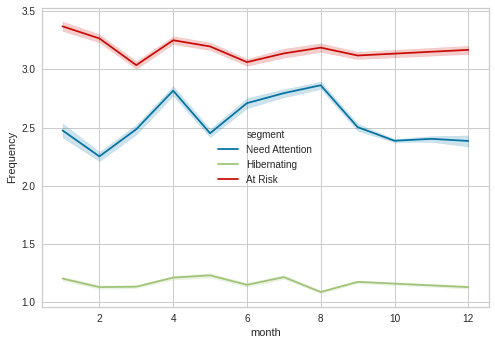

In [105]:
#Aylara gore sıklıgın , segment kırılımında incelenmesi
sns.lineplot(x = "month", y = "Frequency", hue = "segment", data = dff);

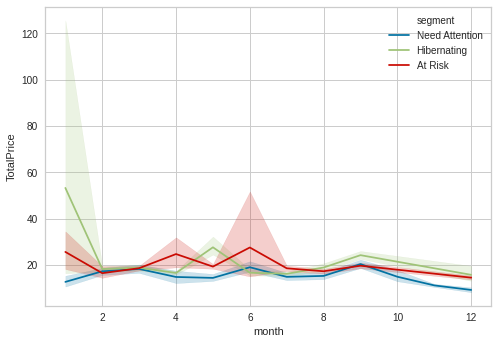

In [106]:
# Aylara gore toplam harcamanın , segment kırılımında incelenmesi.
sns.lineplot(x = "month", y = "TotalPrice", hue = "segment", data = dff);

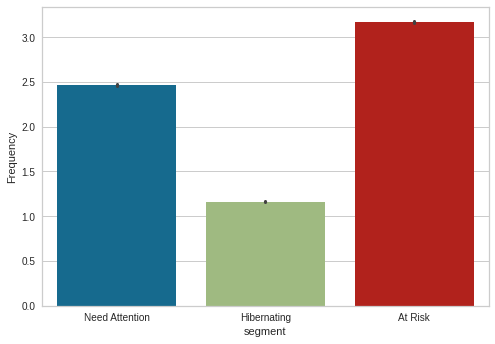

In [107]:
#Belirlediğimiz 3 segmente gore sıklıgın incelenmesi.
sns.barplot(x = "segment", y = "Frequency", data = dff)

In [108]:
# Segmentlerin recency , frequency ve monetary degerlerine gore ortalama ve medyanın incelenmesi.
rfm[["segment","Recency","Frequency","Monetary"]].groupby("segment").agg(["mean","median","count"])

Recency              Frequency              Monetary  \
                       mean median count      mean median count     mean   
segment                                                                    
About to Sleep        52.37     52   353      1.16      1   353   472.55   
At Risk              153.04    138   594      2.87      3   594  1079.81   
Can't Loose          131.05    106    64      8.31      7    64  2791.01   
Champions              5.37      4   632     12.34      8   632  6866.78   
Hibernating          216.66    218  1069      1.10      1  1069   488.86   
Loyal Customers       32.69     29   820      6.44      5   820  2862.89   
Need Attention        51.27     51   184      2.32      2   184   894.49   
New Customers          6.43      7    42      1.00      1    42   388.21   
Potential Loyalists   16.37     17   486      2.01      2   486  1041.34   
Promising             22.42     22    95      1.00      1    95   290.91   

                                   
                     median count  
segment                            
About to Sleep       331.95   353  
At Risk              675.16   594  
Can't Loose         2236.74    64  
Champions           2613.85   632  
Hibernating          293.00  1069  
Loyal Customers     1737.83   820  
Need Attention       637.78   184  
New Customers        274.50    42  
Potential Loyalists  524.00   486  
Promising            219.00    95

In [109]:
# Segmentlerin recency , frequency ve monetary degerlerine gore ortalama ve medyanın incelenmesi.
rfm[["segment","Recency","Frequency","Monetary"]].groupby("segment").agg(["mean","median","count"])

Recency              Frequency              Monetary  \
                       mean median count      mean median count     mean   
segment                                                                    
About to Sleep        52.37     52   353      1.16      1   353   472.55   
At Risk              153.04    138   594      2.87      3   594  1079.81   
Can't Loose          131.05    106    64      8.31      7    64  2791.01   
Champions              5.37      4   632     12.34      8   632  6866.78   
Hibernating          216.66    218  1069      1.10      1  1069   488.86   
Loyal Customers       32.69     29   820      6.44      5   820  2862.89   
Need Attention        51.27     51   184      2.32      2   184   894.49   
New Customers          6.43      7    42      1.00      1    42   388.21   
Potential Loyalists   16.37     17   486      2.01      2   486  1041.34   
Promising             22.42     22    95      1.00      1    95   290.91   

                                   
                     median count  
segment                            
About to Sleep       331.95   353  
At Risk              675.16   594  
Can't Loose         2236.74    64  
Champions           2613.85   632  
Hibernating          293.00  1069  
Loyal Customers     1737.83   820  
Need Attention       637.78   184  
New Customers        274.50    42  
Potential Loyalists  524.00   486  
Promising            219.00    95

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   RecencyScore    4339 non-null   category
 1   FrequencyScore  4339 non-null   category
 2   MonetaryScore   4339 non-null   category
dtypes: category(3)
memory usage: 207.2 KB


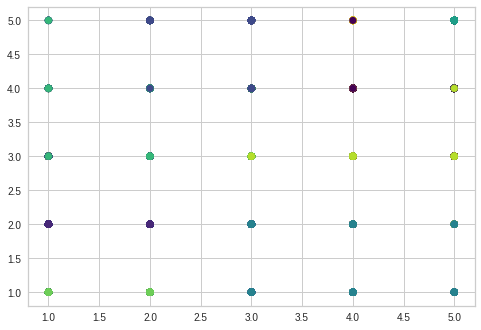

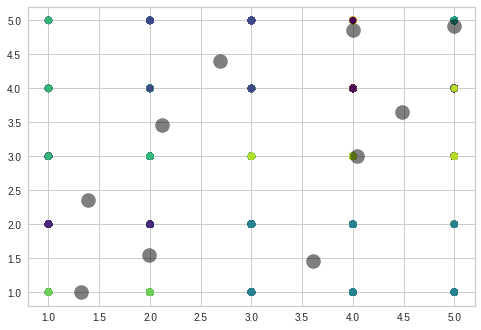

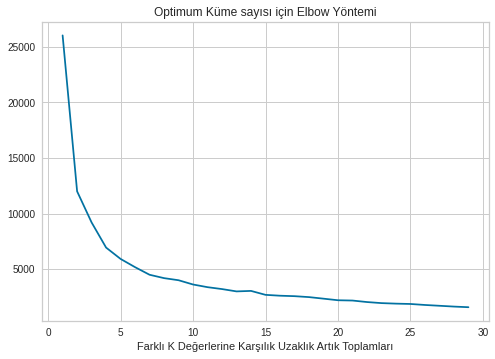

In [110]:
#KMEANS KUMELEME

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# EDA



df = df_rfm.copy()
df.head()
df.isnull().sum()
df.info()
df.describe().T




# K-MEANS
kmeans = KMeans(n_clusters=10)
k_fit = kmeans.fit(df)
k_fit


k_fit.n_clusters
k_fit.cluster_centers_
k_fit.labels_
df[0:5]

# Kümelerin Görselleştirilmesi
k_means = KMeans(n_clusters=10).fit(df)
kumeler = k_means.labels_
type(df)
df = pd.DataFrame(df)

plt.scatter(df.iloc[:, 0],
            df.iloc[:, 1],
            c=kumeler,
            s=50,
            cmap="viridis")
plt.show()


# merkezlerin isaretlenmesi
merkezler = k_means.cluster_centers_

plt.scatter(df.iloc[:, 0],
            df.iloc[:, 1],
            c=kumeler,
            s=50,
            cmap="viridis")

plt.scatter(merkezler[:, 0],
            merkezler[:, 1],
            c="black",
            s=200,
            alpha=0.5)
plt.show()


# Optimum Küme Sayısının Belirlenmesi
kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

ssd

plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()


In [111]:
?k_means

In [113]:


# Daha otomatik bir yol:
df = df_rfm.copy()
kmeans = KMeans()
#visu = KElbowVisualizer(kmeans, k=(2, 20))
#visu.fit(df)
#visu.show()


kmeans = KMeans(n_clusters=10).fit(df)
kumeler = kmeans.labels_



pd.DataFrame({"musteri_no": df.index, "Kumeler": kumeler})

df["cluster_no"] = kumeler

df.head()

df["cluster_no"] = df["cluster_no"] + 1

df.groupby("cluster_no").agg({"cluster_no": "count"})
#df.groupby("cluster_no").agg(np.mean)

df[df["cluster_no"] == 4].head()



,RecencyScore,FrequencyScore,MonetaryScore,cluster_no
Customer ID,,,,
12348.00,2,4,4,4
12352.00,3,5,5,4
12359.00,3,4,5,4
12360.00,3,3,5,4
12370.00,3,4,5,4
